# Cryptocurrency for Energy Conscious Investors

WIP! Getting some ideas together here to narrow down the search for coin historicla trade data. :p

## Overview

We want to utilize analysis tools to evaluate viable investment strategies focussed on eco-friendly cryptocurrencies.

A Monte Carlo simulator will be used to project outcome with various weight strategies.

In [51]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
import numpy as np
import hvplot.pandas
from dotenv import load_dotenv
from pathlib import Path
import alpaca_trade_api as tradeapi
from utils.MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
%matplotlib inline
# Load environment variables from the .env file
load_dotenv()
# print(np.__version__)
# print(pd.__version__)

True

## 1. Calculate any current crypto holdings

In [52]:
## get an endpoint for each coin in portfolio. (The Free Crypto API Call endpoint URLs for the held cryptocurrency assets)

btc_url = "https://api.alternative.me/v2/ticker/bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/ethereum/?convert=USD"
ada_url = "https://api.alternative.me/v2/ticker/cardano/?convert=USD"
nano_url = "https://api.alternative.me/v2/ticker/nano/?convert=USD"
hnt_url = "https://api.alternative.me/v2/ticker/helium/?convert=USD"

# ticker_listings_url = "https://api.alternative.me/v2/listings/"
# ticker_listings_response = requests.get(ticker_listings_url).json()
# tickers = ticker_listings_response["data"] # json.dumps(ticker_listings_response, indent=4, sort_keys=True))
# tickers


In [53]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()
eth_response = requests.get(eth_url).json()
ada_response = requests.get(ada_url).json()
nano_response = requests.get(nano_url).json()
hnt_response = requests.get(hnt_url).json()

# Preview and check the data if necessary
print(json.dumps(ada_response, indent=4, sort_keys=True))

{
    "data": {
        "2010": {
            "circulating_supply": 33820262544,
            "id": 2010,
            "last_updated": 1652485987,
            "max_supply": 45000000000,
            "name": "Cardano",
            "quotes": {
                "USD": {
                    "market_cap": 17889561170,
                    "percent_change_1h": -3.16394475803719,
                    "percent_change_24h": 10.7617056653215,
                    "percent_change_7d": -33.446137908701,
                    "percentage_change_1h": -3.16394475803719,
                    "percentage_change_24h": 10.7617056653215,
                    "percentage_change_7d": -33.446137908701,
                    "price": 0.527752,
                    "volume_24h": 1746565885
                }
            },
            "rank": 3,
            "symbol": "ADA",
            "total_supply": 33820262544,
            "website_slug": "cardano"
        }
    },
    "metadata": {
        "error": null,
        "num_cry

In [54]:
# print(json.dumps(hnt_response, indent=4, sort_keys=True))

In [55]:
## Current crypto holdings:  BTC, ETH, ADA, NANO and HNT

btc_holdings = 0.210051
eth_holdings = 10.723321
ada_holdings = 10000
nano_holdings = 7000
hnt_holdings = 500

btc_value = btc_holdings * btc_response["data"]["1"]["quotes"]["USD"]["price"]
eth_value = eth_holdings * eth_response["data"]["1027"]["quotes"]["USD"]["price"]
ada_value = ada_holdings * ada_response["data"]["2010"]["quotes"]["USD"]["price"]
nano_value = nano_holdings * nano_response["data"]["1567"]["quotes"]["USD"]["price"]
hnt_value = hnt_holdings * hnt_response["data"]["10993"]["quotes"]["USD"]["price"]

holdings = dict()
holdings.update([
    (btc_value, 'btc'), 
    (eth_value, 'eth'), 
    (ada_value, 'ada'), 
    (nano_value, 'nano'),
    (hnt_value, 'hnt'),
    ])

holdings_df = pd.DataFrame(holdings,index=[0]).transpose()
holdings_df = holdings_df.reset_index()
holdings_df2 = holdings_df.rename({'index': 'amt', 0: 'symbol'}, axis=1)

holdings_df2.head()

,amt,symbol
0,6152.813892,btc
1,21602.130155,eth
2,5277.520000,ada
3,7504.000000,nano
4,4930.000000,hnt


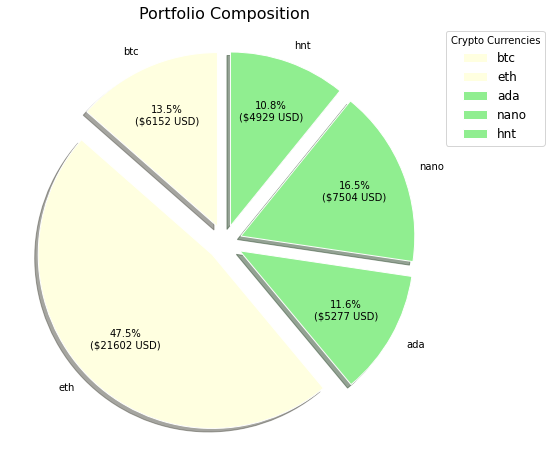

In [56]:
## Pie chart

assets = holdings_df2['symbol']
data = holdings_df2['amt']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
colors = ("lightyellow", "lightyellow", "lightgreen", "lightgreen", "lightgreen")
wp = { 'linewidth' : 1, 'edgecolor' : "white" }

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n(${:d} USD)".format(pct, absolute)
 
fig, ax = plt.subplots(figsize =(8, 8))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  pctdistance = 0.7,
                                  explode = explode,
                                  labels = assets,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black")
                                 )
 
ax.legend(wedges, assets,
          title ="Crypto Currencies",
          loc ="upper right",
          fontsize = "large",
          bbox_to_anchor =(1, 0, 0.25, 1))
 
plt.setp(autotexts, size=10)
ax.set_title("Portfolio Composition", fontsize=16)
 
plt.show()

In [57]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = round(btc_value + eth_value + ada_value + nano_value + hnt_value,2)

# Print current cryptocurrency wallet balance
print(f"${total_crypto_wallet}")


$45466.46


### Get crypto trade history for Eco Currencies

We could start with a pandas structure for our portfolio of eco currencies.


In [58]:
eco_portfolio = Path("data/eco_portfolio.csv")
eco_portfolio_df = pd.read_csv(eco_portfolio, index_col="id", infer_datetime_format=True, parse_dates=True)


FileNotFoundError: [Errno 2] No such file or directory: 'data\\eco_portfolio.csv'

#### Review the total number of shares held in both (SPY) and (AGG).

In [38]:
# Make a list from the Series

symbols = assets.tolist()


['btc', 'eth', 'ada', 'nano', 'hnt']


In [39]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_SECRET_KEY")
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

str

str

In [44]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = symbols
# Set timeframe to 1Day
timeframe = "1Day"
# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2017-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-01", tz="America/New_York").isoformat()

In [48]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


In [47]:
# Reorganize the DataFrame
# Separate ticker data
# SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
# AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# # Concatenate the ticker DataFrames
# prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame
len(prices_df)

1888

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df['AGG']['close'])

# Print the AGG closing price
agg_close_price

119.43

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df['SPY']['close'])

# Print the SPY closing price
spy_close_price

334.57

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
agg_value

23886.0

In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
spy_value

36802.7

In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds

60688.7

In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = round(total_stocks_bonds + total_crypto_wallet, 2)

# Print current cryptocurrency wallet balance
total_portfolio

111333.67

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds] 

# Review the Python list savings_data
savings_data 

[50644.97, 60688.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'stock/bond'])

# Display the savings_df DataFrame
savings_df


,amount
crypto,50644.97
stock/bond,60688.70


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

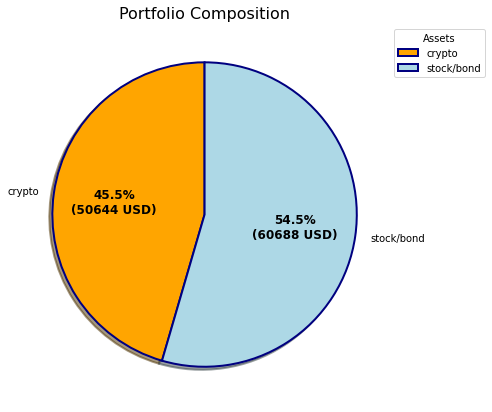

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart

# Creating dataset
assets = savings_df.index.values.tolist()
data = savings_df['amount']

## Creating explode data
explode = (0.0, 0.0)
 
## Creating color parameters
colors = ("orange", "lightblue")
 
## Wedge properties
wp = { 'linewidth' : 2, 'edgecolor' : "navy" }
 
## Creating autopct arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} USD)".format(pct, absolute)
 
## Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = assets,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, assets,
          title ="Assets",
          loc ="upper right",
          bbox_to_anchor =(1, 0, 0.25, 1))
 
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Portfolio Composition", fontsize=16)
 
# show plot
plt.show()


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"Congratulations for having enough money in this fund.")

elif total_portfolio == emergency_fund_value:
    print(f"Congratulations on reaching this important goal.")

else:
    print(f"Sorry, you are {emergency_fund_value-total_portfolio} dollars away from reaching the goal.")


Congratulations for having enough money in this fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2017-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
#row_limit = 1000

In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
daily_returns_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    # limit=row_limit
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = daily_returns_df[daily_returns_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = daily_returns_df[daily_returns_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
daily_returns_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"]) # .dropna()

# Display both the first and last five rows of the DataFrame
display(daily_returns_df.head(5))
display(daily_returns_df.tail(5))
# len(daily_returns_df)

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  247.50  247.87  247.37  247.87   31995021   
2017-08-08 04:00:00+00:00  247.49  248.91  246.83  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.06  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.70  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-08-07 04:00:00+00:00      100111  247.668698  109.69  109.72  109.6066   
2017-08-08 04:00:00+00:00      192921  247.739709  109.67  109.69  109.5000   
2017-08-09 04:00:00+00:00      223650  246.791421  109.87  109.87  109.6600   
2017-08-10 04:00:00+00:00      424321  245.027847  109.70  109.85  109.6700   
2017-08-11 04:00:00+00:00      278786  244.222867  109.75  109.94  109.6800   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-08-07 04:00:00+00:00  109.67  2359826        7755  109.674876  
2017-08-08 04:00:00+00:00  109.57  2570876       12663  109.577636  
2017-08-09 04:00:00+00:00  109.67  2308932       11031  109.771749  
2017-08-10 04:00:00+00:00  109.78  2004163       12437  109.776611  
2017-08-11 04:00:00+00:00  109.87  1913253       10113  109.860974

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2020-08-03 04:00:00+00:00  328.31  329.62  327.73  328.79  53080454   
2020-08-04 04:00:00+00:00  327.88  330.06  327.86  330.06  41918004   
2020-08-05 04:00:00+00:00  331.46  332.39  331.18  332.11  42870955   
2020-08-06 04:00:00+00:00  331.52  334.46  331.13  334.33  43745653   
2020-08-07 04:00:00+00:00  333.29  334.88  332.30  334.57  57282821   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2020-08-03 04:00:00+00:00      288008  328.658804  119.37  119.40  119.1903   
2020-08-04 04:00:00+00:00      250900  329.057593  119.42  119.63  119.4200   
2020-08-05 04:00:00+00:00      241416  331.791643  119.39  119.49  119.3100   
2020-08-06 04:00:00+00:00      290039  332.937218  119.62  119.73  119.5300   
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.3950   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-03 04:00:00+00:00  119.40  13014535       36359  119.282420  
2020-08-04 04:00:00+00:00  119.63  10935181       39114  119.541666  
2020-08-05 04:00:00+00:00  119.40  17377874       42313  119.387245  
2020-08-06 04:00:00+00:00  119.57   4608710       15938  119.604199  
2020-08-07 04:00:00+00:00  119.43   5559066       15246  119.475306

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_30yr_6040_weight = MCSimulation(
    portfolio_data = daily_returns_df,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_30yr_6040_weight.portfolio_data


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  247.50  247.87  247.37  247.87   31995021   
2017-08-08 04:00:00+00:00  247.49  248.91  246.83  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.06  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.70  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   
...                           ...     ...     ...     ...        ...   
2020-08-03 04:00:00+00:00  328.31  329.62  327.73  328.79   53080454   
2020-08-04 04:00:00+00:00  327.88  330.06  327.86  330.06   41918004   
2020-08-05 04:00:00+00:00  331.46  332.39  331.18  332.11   42870955   
2020-08-06 04:00:00+00:00  331.52  334.46  331.13  334.33   43745653   
2020-08-07 04:00:00+00:00  333.29  334.88  332.30  334.57   57282821   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-07 04:00:00+00:00      100111  247.668698          NaN  109.69   
2017-08-08 04:00:00+00:00      192921  247.739709    -0.002461  109.67   
2017-08-09 04:00:00+00:00      223650  246.791421    -0.000040  109.87   
2017-08-10 04:00:00+00:00      424321  245.027847    -0.014115  109.70   
2017-08-11 04:00:00+00:00      278786  244.222867     0.001477  109.75   
...                               ...         ...          ...     ...   
2020-08-03 04:00:00+00:00      288008  328.658804     0.006952  119.37   
2020-08-04 04:00:00+00:00      250900  329.057593     0.003863  119.42   
2020-08-05 04:00:00+00:00      241416  331.791643     0.006211  119.39   
2020-08-06 04:00:00+00:00      290039  332.937218     0.006685  119.62   
2020-08-07 04:00:00+00:00      350100  333.800372     0.000718  119.66   

                                                                           \
                             high       low   close    volume trade_count   
timestamp                                                                   
2017-08-07 04:00:00+00:00  109.72  109.6066  109.67   2359826        7755   
2017-08-08 04:00:00+00:00  109.69  109.5000  109.57   2570876       12663   
2017-08-09 04:00:00+00:00  109.87  109.6600  109.67   2308932       11031   
2017-08-10 04:00:00+00:00  109.85  109.6700  109.78   2004163       12437   
2017-08-11 04:00:00+00:00  109.94  109.6800  109.87   1913253       10113   
...                           ...       ...     ...       ...         ...   
2020-08-03 04:00:00+00:00  119.40  119.1903  119.40  13014535       36359   
2020-08-04 04:00:00+00:00  119.63  119.4200  119.63  10935181       39114   
2020-08-05 04:00:00+00:00  119.49  119.3100  119.40  17377874       42313   
2020-08-06 04:00:00+00:00  119.73  119.5300  119.57   4608710       15938   
2020-08-07 04:00:00+00:00  119.73  119.3950  119.43   5559066       15246   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-07 04:00:00+00:00  109.674876          NaN  
2017-08-08 04:00:00+00:00  109.577636    -0.000912  
2017-08-09 04:00:00+00:00  109.771749     0.000913  
2017-08-10 04:00:00+00:00  109.776611     0.001003  
2017-08-11 04:00:00+00:00  109.860974     0.000820  
...                               ...          ...  
2020-08-03 04:00:00+00:00  119.282420    -0.001338  
2020-08-04 04:00:00+00:00  119.541666     0.001926  
2020-08-05 04:00:00+00:00  119.387245    -0.001923  
2020-08-06 04:00:00+00:00  119.604199     0.001424  
2020-08-07 04:00:00+00:00  119.475306    -0.001171  

[757 rows x 16 columns]

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr_6040_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\hoestreicher\Development\FinTech\Projects\utils\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999430,0.998314,0.984080,0.994930,0.999397,1.001600,1.006787,0.994666,0.998264,1.003016,...,0.995988,1.014822,1.003555,1.003576,0.995270,0.997727,1.023199,1.001449,0.996500,0.991952
2,0.994363,0.998372,0.986483,1.003959,1.004215,1.005396,1.005193,0.998020,1.003830,0.985602,...,0.983768,1.014941,1.003763,1.009833,0.997409,0.991694,1.024668,0.994600,1.005708,0.981454
3,0.988601,0.999261,0.992033,1.002537,1.007433,1.002681,1.005326,1.008313,1.004530,0.976920,...,0.981912,1.018990,1.005017,1.003047,1.017160,0.982726,1.019856,1.002874,1.021847,0.983352
4,0.993559,0.999577,0.997921,1.012692,1.011839,0.991947,1.008417,0.997093,1.009808,0.978873,...,0.980865,1.014786,1.011974,1.002995,1.014321,0.964962,1.020258,0.997001,1.017008,0.990151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.522415,24.477866,29.410560,13.522584,33.090577,21.129132,7.537063,22.804389,35.315693,20.912738,...,10.889119,5.930184,5.985869,8.189116,29.350684,14.002340,23.584068,21.450625,6.454597,5.449969
7557,15.353298,24.247074,29.619699,13.548611,33.112031,21.464258,7.575519,22.902665,35.723105,20.984445,...,10.973899,5.934163,5.977600,8.116380,29.599272,14.075965,23.720099,21.403018,6.366520,5.439655
7558,15.373870,24.543988,29.317205,13.585068,33.275684,21.581071,7.641980,22.731094,35.762194,20.824787,...,10.921121,6.056807,6.045261,8.124204,29.555974,14.112668,23.605231,21.699162,6.365087,5.492420
7559,15.337454,24.532617,29.448993,13.705245,33.434271,21.701223,7.772318,22.765760,35.808399,20.925822,...,11.021572,6.105188,6.059633,8.087941,29.588344,14.112146,23.687930,21.818117,6.404480,5.572907


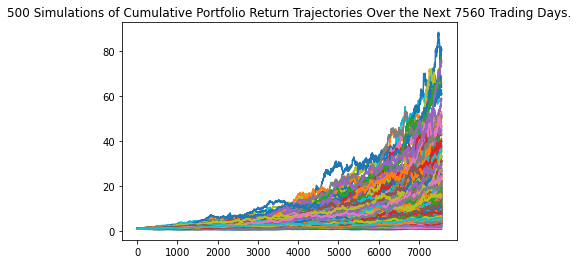

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_30yr_6040_weight_line_plot = MC_30yr_6040_weight.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

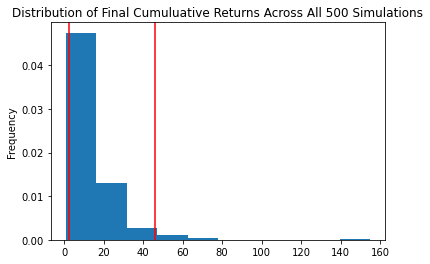

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_30yr_6040_weight_dist_plot = MC_30yr_6040_weight.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_30yr_summary_stats = MC_30yr_6040_weight.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_30yr_summary_stats)

count           500.000000
mean             13.636530
std              12.686426
min               0.854637
25%               6.244916
50%               9.921398
75%              17.206405
max             155.018612
95% CI Lower      2.530724
95% CI Upper     46.019953
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio

print(total_stocks_bonds)

60688.7


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(MC_30yr_summary_stats[8]*total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(MC_30yr_summary_stats[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of {total_stocks_bonds} in the curent portfolio"
      f" with standard 60/40 weight in SPX and AGG over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


There is a 95% chance that an initial investment of 60688.7 in the curent portfolio with standard 60/40 weight in SPX and AGG over the next 30 years will end within in the range of $153586.35 and $2792891.1.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_10yr_8020_weight = MCSimulation(
    portfolio_data = daily_returns_df,
    weights = [.8,.2],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_10yr_8020_weight.portfolio_data


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  247.50  247.87  247.37  247.87   31995021   
2017-08-08 04:00:00+00:00  247.49  248.91  246.83  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.06  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.70  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   
...                           ...     ...     ...     ...        ...   
2020-08-03 04:00:00+00:00  328.31  329.62  327.73  328.79   53080454   
2020-08-04 04:00:00+00:00  327.88  330.06  327.86  330.06   41918004   
2020-08-05 04:00:00+00:00  331.46  332.39  331.18  332.11   42870955   
2020-08-06 04:00:00+00:00  331.52  334.46  331.13  334.33   43745653   
2020-08-07 04:00:00+00:00  333.29  334.88  332.30  334.57   57282821   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-07 04:00:00+00:00      100111  247.668698          NaN  109.69   
2017-08-08 04:00:00+00:00      192921  247.739709    -0.002461  109.67   
2017-08-09 04:00:00+00:00      223650  246.791421    -0.000040  109.87   
2017-08-10 04:00:00+00:00      424321  245.027847    -0.014115  109.70   
2017-08-11 04:00:00+00:00      278786  244.222867     0.001477  109.75   
...                               ...         ...          ...     ...   
2020-08-03 04:00:00+00:00      288008  328.658804     0.006952  119.37   
2020-08-04 04:00:00+00:00      250900  329.057593     0.003863  119.42   
2020-08-05 04:00:00+00:00      241416  331.791643     0.006211  119.39   
2020-08-06 04:00:00+00:00      290039  332.937218     0.006685  119.62   
2020-08-07 04:00:00+00:00      350100  333.800372     0.000718  119.66   

                                                                           \
                             high       low   close    volume trade_count   
timestamp                                                                   
2017-08-07 04:00:00+00:00  109.72  109.6066  109.67   2359826        7755   
2017-08-08 04:00:00+00:00  109.69  109.5000  109.57   2570876       12663   
2017-08-09 04:00:00+00:00  109.87  109.6600  109.67   2308932       11031   
2017-08-10 04:00:00+00:00  109.85  109.6700  109.78   2004163       12437   
2017-08-11 04:00:00+00:00  109.94  109.6800  109.87   1913253       10113   
...                           ...       ...     ...       ...         ...   
2020-08-03 04:00:00+00:00  119.40  119.1903  119.40  13014535       36359   
2020-08-04 04:00:00+00:00  119.63  119.4200  119.63  10935181       39114   
2020-08-05 04:00:00+00:00  119.49  119.3100  119.40  17377874       42313   
2020-08-06 04:00:00+00:00  119.73  119.5300  119.57   4608710       15938   
2020-08-07 04:00:00+00:00  119.73  119.3950  119.43   5559066       15246   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-07 04:00:00+00:00  109.674876          NaN  
2017-08-08 04:00:00+00:00  109.577636    -0.000912  
2017-08-09 04:00:00+00:00  109.771749     0.000913  
2017-08-10 04:00:00+00:00  109.776611     0.001003  
2017-08-11 04:00:00+00:00  109.860974     0.000820  
...                               ...          ...  
2020-08-03 04:00:00+00:00  119.282420    -0.001338  
2020-08-04 04:00:00+00:00  119.541666     0.001926  
2020-08-05 04:00:00+00:00  119.387245    -0.001923  
2020-08-06 04:00:00+00:00  119.604199     0.001424  
2020-08-07 04:00:00+00:00  119.475306    -0.001171  

[757 rows x 16 columns]

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr_8020_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\hoestreicher\Development\FinTech\Module_Challanges\Module_5\financial_analysis_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007940,1.007169,1.003907,0.990410,1.009372,1.003609,0.984188,0.989741,1.004118,1.010395,...,0.999492,1.005179,1.009982,0.983596,0.997940,0.998614,0.982993,0.993891,0.976691,1.004192
2,1.002368,1.009543,0.998162,0.995023,1.015955,0.999563,0.977764,0.980619,0.997422,1.017166,...,0.977660,1.018330,1.021648,0.980847,1.005909,1.001677,0.986283,0.986953,0.951167,0.983570
3,1.009353,0.972528,0.991466,1.003768,1.003621,0.989001,0.980996,0.980936,1.018041,1.015964,...,0.972438,1.021006,1.003667,0.956806,1.007413,1.002811,0.973038,0.973569,0.960139,0.990564
4,1.006230,0.989640,0.979248,1.015053,1.018380,0.994342,0.991691,0.978635,1.030697,1.013546,...,0.970064,1.030195,1.007834,0.957157,1.001012,1.007807,0.981206,0.967296,0.962303,0.997936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.037787,5.544233,2.684865,3.071989,2.077466,3.827046,3.115933,3.779043,2.023794,3.686286,...,5.439319,2.545020,1.507479,4.006816,4.013949,1.051457,1.784830,3.117874,2.597550,4.047861
2517,4.012654,5.488741,2.710505,3.113809,2.091077,3.888908,3.135320,3.741523,2.001339,3.646629,...,5.383186,2.527279,1.502251,3.974619,3.931693,1.059608,1.795101,3.150942,2.585388,4.044788
2518,4.074502,5.466783,2.728681,3.095292,2.072106,3.877110,3.119008,3.724425,1.989443,3.778319,...,5.381946,2.519254,1.527737,3.998081,3.952638,1.059326,1.771833,3.122202,2.595855,4.006619
2519,4.085747,5.612556,2.718221,3.059322,2.104064,3.902703,3.131866,3.833505,1.994620,3.760244,...,5.368223,2.487786,1.506037,3.995182,3.903465,1.051675,1.745801,3.098649,2.532720,3.963928


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

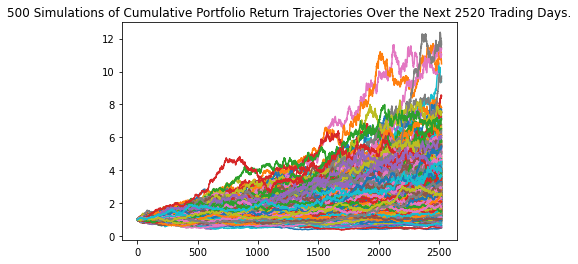

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10yr_8020_weight.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

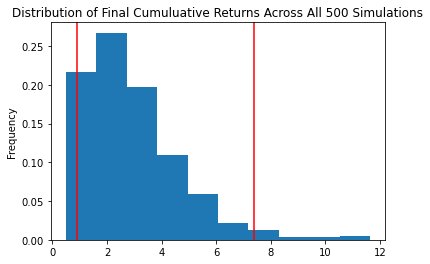

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10yr_8020_weight.plot_distribution()

In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
MC_10yr_8020_weight_summary_stats = MC_10yr_8020_weight.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
MC_10yr_8020_weight_summary_stats


count           500.000000
mean              2.931737
std               1.720372
min               0.492169
25%               1.649083
50%               2.531142
75%               3.761884
max              11.635223
95% CI Lower      0.916598
95% CI Upper      7.396726
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds

60688.7

In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(MC_10yr_8020_weight_summary_stats[8]*total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(MC_10yr_8020_weight_summary_stats[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of {total_stocks_bonds} in the curent portfolio"
      f" with 80/20 weight in SPX and AGG over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")

There is a 95% chance that an initial investment of 60688.7 in the curent portfolio with 80/20 weight in SPX and AGG over the next 10 years will end within in the range of $55627.16 and $448897.69.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?